***
# Warm Up
***
_Report by Adi Agimba_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.polynomial.polynomial as poly
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<br>

### **Task 1**

<br>**Load and plot the data.**

In [2]:
df = pd.read_csv("C:\\Users\\adiki\\c3_warm-up\\p3_task-1.csv")
X = df.x.values
y = df.y.values

In [3]:
df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


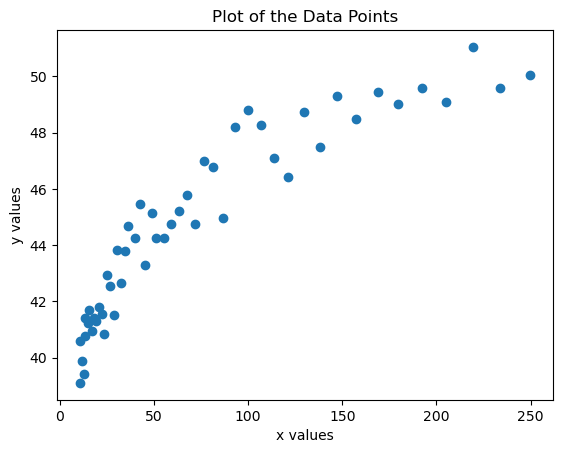

In [4]:
plt.scatter(X, y)
plt.title("Plot of the Data Points")
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

**Define a new variable log(x) and transform the data.**

In [5]:
def fit(X, y, deg, xlabel, ylabel, legend):
    coefs = poly.polyfit(np.log(X), y, deg=deg)

    x_values = np.linspace(X.min(), X.max(), num=100)

    y_values = poly.polyval(np.log(x_values), coefs)

    plt.scatter(X, y)
    plt.plot(x_values, y_values, c="C1", label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

<br>**Fit a model to the new data and plot the logarithmic curve against the original data.**

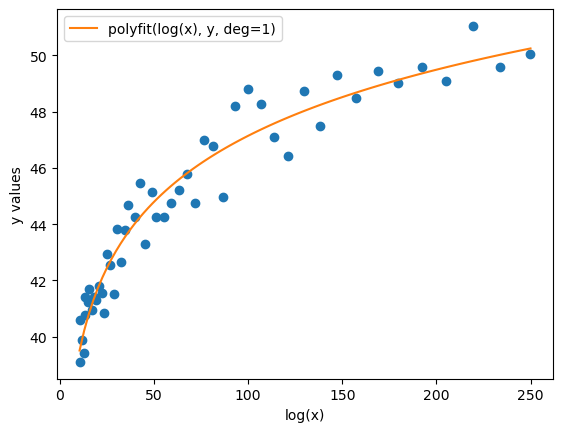

In [6]:
fit(X, y, 1, "log(x)", "y values", "polyfit(log(x), y, deg=1)")

**Compute the RSS and R2 measures.**

In [7]:
coefs = poly.polyfit(np.log(X), y, deg=1)

In [8]:
y_pred = poly.polyval(np.log(X), coefs)

In [9]:
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

In [10]:
rss_baseline = RSS(y, y.mean())
print("RSS baseline:", rss_baseline)

RSS baseline: 541.1432872199999


In [11]:
rss_value = RSS(y, y_pred)

In [12]:
print("RSS score:", rss_value)

RSS score: 31.842651752756776


In [13]:
R2 = 1 - (rss_value / rss_baseline)
print("R-squared coefficient:", R2)

R-squared coefficient: 0.9411567093138287


<br>**Discuss the results, is it a good R2 score?**

There is a sizable difference between the constant mean baseline and the residual sum of squares. A lower RSS score suggests that the linear regression model performs better relative to the RSS baseline score. 

The R-squared coeffficient of 0.9411 demonstrates that atleast 94% of variability found in the dependent variable is explained by the independant variable for all the observations. Therefore, there is evidence of the linear regression model's predictive power.

### **Task 2**

In [14]:
df2 = pd.read_csv("C:\\Users\\adiki\\c3_warm-up\\p3_task-2.csv")

In [15]:
df2.shape

(1000, 4)

In [16]:
df2.corr().round(2)

,x1,x2,x3,y
x1,1.00,-0.03,-0.06,0.18
x2,-0.03,1.00,0.27,0.32
x3,-0.06,0.27,1.00,0.06
y,0.18,0.32,0.06,1.00


In [17]:
X_ = df2.iloc[:, :-1]
y_ = df2.iloc[:, -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=99)

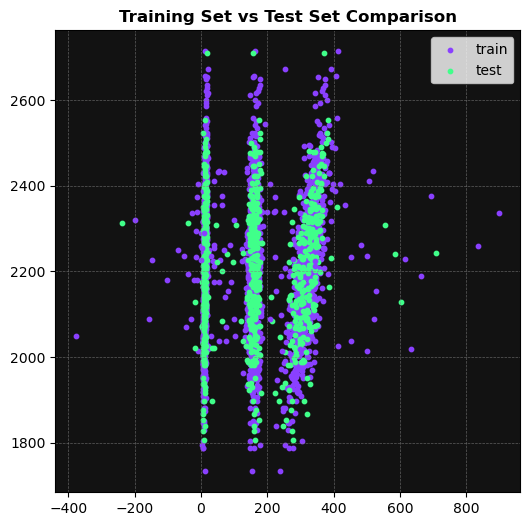

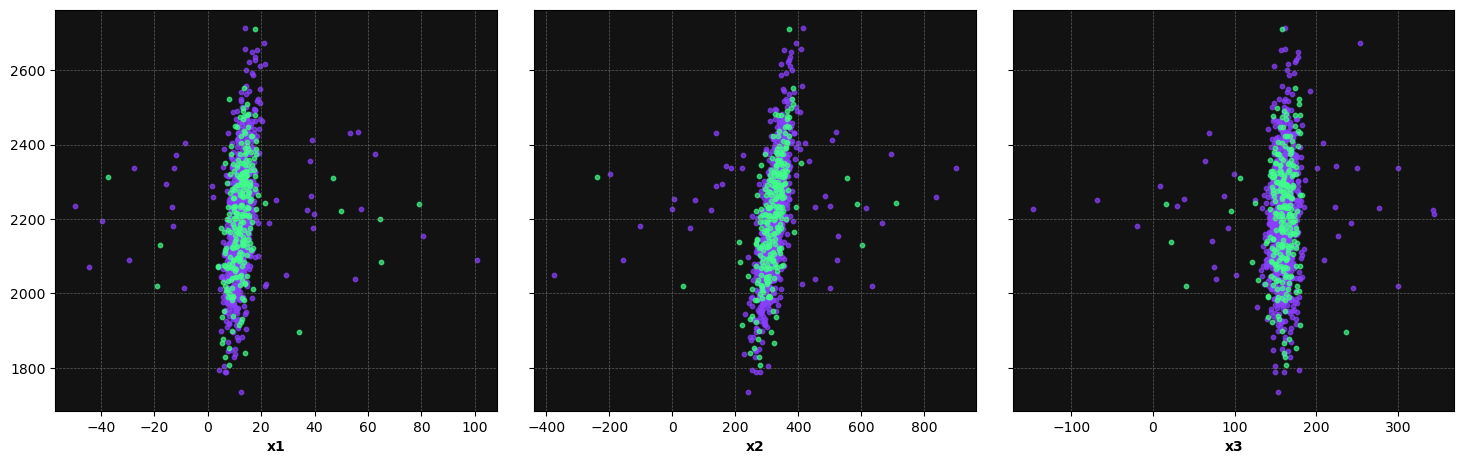

In [19]:
plt.figure(figsize = (6,6))

plt.scatter(X_train["x1"], y_train, s=10, color="#8a40ff")
plt.scatter(X_test["x1"], y_test, s=10, color="#40ff8a")
plt.scatter(X_train["x2"], y_train, s=10, color="#8a40ff")
plt.scatter(X_test["x2"], y_test, s=10, color="#40ff8a")
plt.scatter(X_train["x3"], y_train, s=10, color="#8a40ff", label="train")
plt.scatter(X_test["x3"], y_test, s=10, color="#40ff8a", label="test")

plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
plt.gca().set_facecolor("#121212") 

plt.legend()
plt.title("Training Set vs Test Set Comparison", fontweight="bold")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

axes = axes.flatten()

for i, col in enumerate(X_train.columns):
    ax = axes[i] 
    ax.scatter(X_train[col], y_train, color="#8a40ff", alpha=0.7, s=10, label="Train")
    ax.scatter(X_test[col], y_test, color="#40ff8a", alpha=0.7, s=10, label="Test")
    ax.set_xlabel(col, fontweight="bold")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
    ax.set_facecolor("#121212")

plt.tight_layout(pad=2)
plt.show()

In [20]:
df2.describe().loc[["mean", "50%", "std", "max", "min"]]

,x1,x2,x3,y
mean,12.322190,319.329936,158.595832,2204.251068
50%,12.156500,320.857500,159.457000,2204.511000
std,8.455445,68.823726,25.032233,158.109451
max,100.692000,899.041000,344.797000,2713.866000
min,-49.652000,-375.335000,-146.921000,1733.474000


In [21]:
zfilter_df = np.abs(df2[["x1", "x2", "x3"]] - df2[["x1", "x2", "x3"]].mean(axis=0)) > (2 * df2[["x1", "x2", "x3"]].std(axis=0))

In [22]:
print(f"Number of outliers detected per feature using z-scores:\n")
print(zfilter_df.sum(axis=0))
print(f"\nTotal number of outliers detected:", zfilter_df.sum(axis=0).sum())

Number of outliers detected per feature using z-scores:

x1    35
x2    32
x3    35
dtype: int64

Total number of outliers detected: 102


In [23]:
zfilter_any = zfilter_df.any(axis=1)

In [24]:
outliers = df2.loc[zfilter_any, :]

outliers.shape

(49, 4)

In [25]:
X_train2 = X_train.drop(outliers.index, errors="ignore", axis=0)

In [26]:
y_train2 = y_train.drop(outliers.index, errors="ignore", axis=0)

In [27]:
print(X_train2.shape)
print(y_train2.shape)

(712, 3)
(712,)


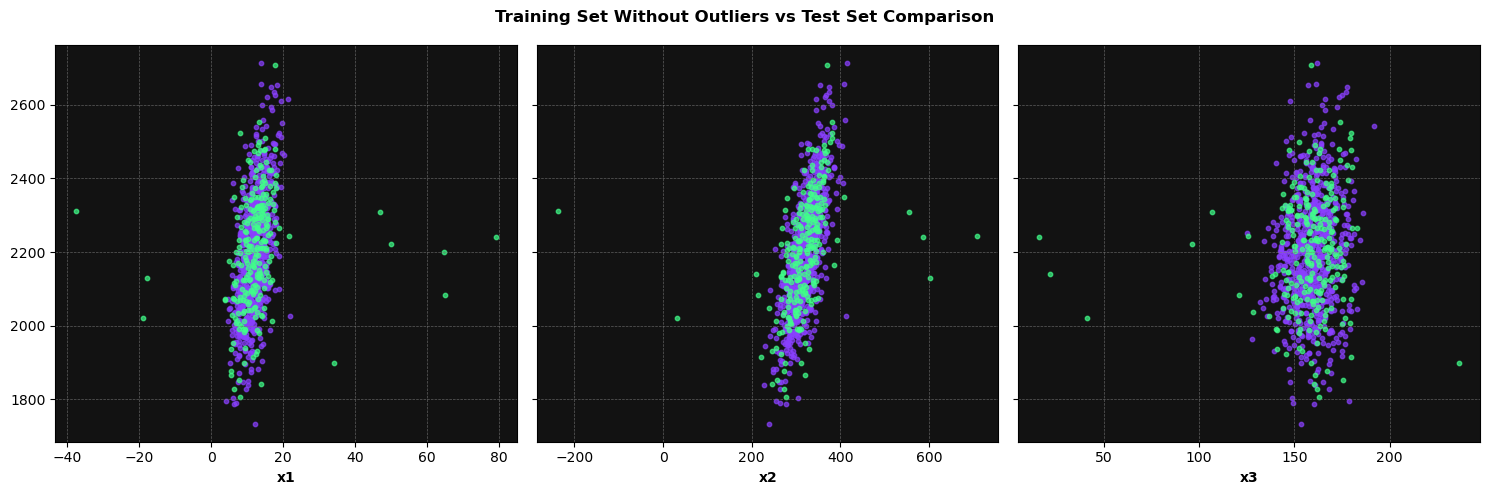

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

axes = axes.flatten()

for i, col in enumerate(X_train2.columns):
    ax = axes[i] 
    ax.scatter(X_train2[col], y_train2, color="#8a40ff", alpha=0.7, s=10, label="Train")
    ax.scatter(X_test[col], y_test, color="#40ff8a", alpha=0.7, s=10, label="Test")
    ax.set_xlabel(col, fontweight="bold")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
    ax.set_facecolor("#121212")

fig.suptitle("Training Set Without Outliers vs Test Set Comparison", fontweight="bold")
plt.tight_layout()
plt.show()

In [29]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [30]:
dummy = DummyRegressor(strategy="median")

dummy.fit(X_train, y_train)

pred_baseline = dummy.predict(X_test)

In [31]:
mae_baseline = MAE(y_test, pred_baseline)

print(f"MAE test set baseline: {mae_baseline}")

MAE test set baseline: 123.45339999999999


<br> **Linear Regression with Outliers**

In [32]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr1 = lr.predict(X_test)

mae_lr1 = metrics.mean_absolute_error(y_test, y_pred_lr1)

print("Linear regression with outliers... \n")
print(f"MAE train set: {metrics.mean_absolute_error(y_train, lr.predict(X_train))}")
print(f"MAE test set: {mae_lr1}")

Linear regression with outliers... 

MAE train set: 115.81710339491127
MAE test set: 114.2250787405142


<br> **Linear Regression without Outliers**

In [33]:
lr2 = LinearRegression()

lr2.fit(X_train2, y_train2)

y_pred_lr2 = lr2.predict(X_test)

mae_lr2 = metrics.mean_absolute_error(y_test, y_pred_lr2)

print("Linear regression without outliers... \n")
print(f"MAE train set: {metrics.mean_absolute_error(y_train2, lr.predict(X_train2))}")
print(f"MAE test set: {mae_lr2}")

Linear regression without outliers... 

MAE train set: 109.54251765669687
MAE test set: 117.55584103936545


<br> **Huber Regression with Outliers**

In [34]:
lr_huber = HuberRegressor(epsilon=1.35)

lr_huber.fit(X_train, y_train)

y_pred_huber = lr_huber.predict(X_test)

mae_huber = metrics.mean_absolute_error(y_test, y_pred_huber)

print("Huber loss regression with outliers... \n")
print(f"MAE train set: {metrics.mean_absolute_error(y_train, lr_huber.predict(X_train))}")
print(f"MAE test set: {metrics.mean_absolute_error(y_test, y_pred_huber)}")

Huber loss regression with outliers... 

MAE train set: 102.75795795835734
MAE test set: 107.50297805328903


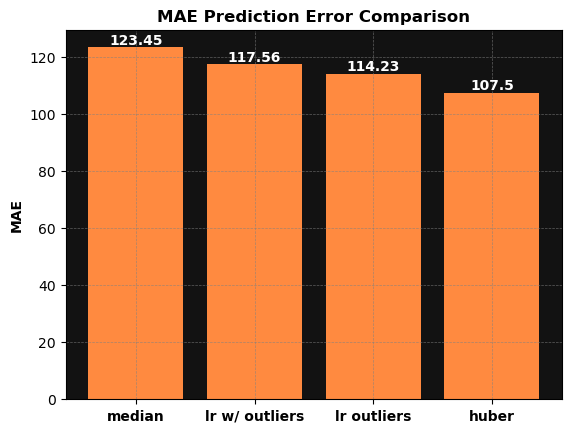

In [35]:
mae_values = [round(mae_baseline, 2), round(mae_lr2, 2), round(mae_lr1, 2), round(mae_huber, 2)]
titles = ["median", "lr w/ outliers", "lr outliers", "huber"]

for i, value in enumerate(mae_values):
    plt.text(i, value, str(value), ha="center", va="bottom", color="white", fontsize=10, fontweight="bold")

plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
plt.gca().set_facecolor("#121212") 

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values, color="#ff8a40")
plt.xticks(xcor, titles, fontweight="bold")

plt.title("MAE Prediction Error Comparison", fontweight="bold")
plt.ylabel("MAE", fontweight="bold")
plt.show()

The linear regression model without outliers has a higher mean absolute error score than the linear regression with outliers. 